In [1]:
!pip3 install pymysql==0.9.3

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [1]:
import pymysql
import boto3
import pandas as pd
import numpy as np
import s3fs
import locale
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connection = pymysql.connect( 'database-1.cbrnhoat32p7.us-east-1.rds.amazonaws.com', 'myuser', 'myPass05')
cursor = connection.cursor()
print(cursor)

In [3]:
cursor.execute("select version()")

1

In [4]:
data = cursor.fetchone()

In [5]:
data

('8.0.28',)

In [6]:
sql = '''select database collections'''

In [7]:
sql = '''use collections''' 
cursor.execute(sql)

0

In [8]:
#show the tables in RDs
sql = '''
show tables
'''
cursor.execute(sql)


2

In [9]:
cursor.fetchall()


(('items',), ('laptops',))

In [10]:
sql = '''select * from collections.laptops'''
cursor.execute(sql)
df = pd.read_sql_query(sql, connection)
df

/usr/local/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Title,Image,Rating,ProdLink,TotalReviews,Price,OrgPrice,CouponsDesc,CouponsSummery,CouponPrice,PercentReduction,id
0,HP Pavilion 17.3-inch IPS FHD Laptop (2022 Mod...,https://m.media-amazon.com/images/I/71B71IA8sG...,4.4 out of 5 stars,https://www.amazon.com/gp/slredirect/picassoRe...,149.0,849.00,849.00,FREE Shipping by Amazon,None,849.00,0.000000,0
1,"2022 Newest HP 15 Laptop, 15.6-inch Full HD Di...",https://m.media-amazon.com/images/I/51uG6H2MLz...,4.4 out of 5 stars,https://www.amazon.com/gp/slredirect/picassoRe...,14.0,899.00,899.00,None,None,899.00,0.000000,1
2,2022 Newest HP Premium 14-inch HD Laptop| Inte...,https://m.media-amazon.com/images/I/61Z-ANWd3b...,4.5 out of 5 stars,https://www.amazon.com/HP-Premium-14-inch-Cele...,42.0,359.99,359.99,FREE Shipping by Amazon,None,359.99,0.000000,2
3,"2022 Newest HP Pavilion 17.3"" FHD Display Lapt...",https://m.media-amazon.com/images/I/718V0aqaE1...,4.5 out of 5 stars,https://www.amazon.com/HP-Pavilion-Computer-i3...,79.0,519.00,519.00,FREE Shipping by Amazon,None,519.00,0.000000,3
4,"HP 15-inch Laptop, 11th Generation Intel Core ...",https://m.media-amazon.com/images/I/71RD3vsjIY...,4.4 out of 5 stars,https://www.amazon.com/HP-Generation-i5-1135G7...,3339.0,460.00,520.00,FREE Shipping,-21%,460.00,11.538462,4
...,...,...,...,...,...,...,...,...,...,...,...,...
457,"2022 HP 15.6"" FHD Slim and Light Laptop, Intel...",https://m.media-amazon.com/images/I/71v0XArWoZ...,5.0 out of 5 stars,https://www.amazon.com/HP-i5-1135G7-Graphics-W...,2.0,559.00,559.00,FREE Shipping by Amazon,None,559.00,0.000000,457
458,"HP Chromebook 14 Laptop, Intel Celeron Process...",https://m.media-amazon.com/images/I/71jEXmA6dF...,4.5 out of 5 stars,https://www.amazon.com/HP-Chromebook-Touchscre...,50.0,204.86,289.99,FREE Shipping by Amazon,-15%,204.86,29.356185,458
459,"2022 HP HP Victus Gaming 16.1"" FHD Laptop Comp...",https://m.media-amazon.com/images/I/61LVl0pDgv...,5.0 out of 5 stars,https://www.amazon.com/HP-Computer-i7-10870H-K...,5.0,1399.00,1399.00,None,None,1399.00,0.000000,459
460,"HP 17 Laptop PC, 11th Gen Intel Core i3-1125G4...",https://m.media-amazon.com/images/I/81vP9bbavW...,4.1 out of 5 stars,https://www.amazon.com/HP-i3-1125G4-Touchscree...,50.0,399.00,549.00,Save 7%,More Buying Choices,399.00,27.322404,460


In [11]:
#df['PercentReduction'] = df.apply(lambda row: abs(((row.CouponPrice - row.OrgPrice)/row.OrgPrice) * 100), axis=1)
#df.head(10)
df.columns

Index(['Title', 'Image', 'Rating', 'ProdLink', 'TotalReviews', 'Price',
       'OrgPrice', 'CouponsDesc', 'CouponsSummery', 'CouponPrice',
       'PercentReduction', 'id'],
      dtype='object')

In [12]:
df=df.sort_values(by='PercentReduction', ascending=False)
df.head(20) 

,Title,Image,Rating,ProdLink,TotalReviews,Price,OrgPrice,CouponsDesc,CouponsSummery,CouponPrice,PercentReduction,id
215,"HP Stream 11.6-inch HD Laptop, Intel Celeron N...",https://m.media-amazon.com/images/I/71idFa2cEu...,4.3 out of 5 stars,https://www.amazon.com/HP-11-6-inch-Celeron-Pe...,1163.0,99.25,236.99,FREE Shipping by Amazon,More Buying Choices,99.25,58.120596,215
371,HP Chromebook 14-Inch Laptop with 180-Degree H...,https://m.media-amazon.com/images/I/91saq89jFy...,4.4 out of 5 stars,https://www.amazon.com/HP-Chromebook-180-degre...,5001.0,121.89,261.40,FREE Shipping by Amazon,-7%,121.89,53.370314,371
216,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",https://m.media-amazon.com/images/I/91XR+02AJB...,4.5 out of 5 stars,https://www.amazon.com/HP-Chromebook-14-Inch-C...,5816.0,119.99,249.00,FREE Shipping,More Buying Choices,119.99,51.811245,216
195,"Newest HP 14"" HD WLED Backlit High Performance...",https://m.media-amazon.com/images/I/61GQjwV30L...,4.4 out of 5 stars,https://www.amazon.com/HP-14-Performance-Wirel...,1193.0,139.00,281.00,FREE Shipping by Amazon,More Buying Choices,139.00,50.533808,195
452,"HP 14 14"" HD SVA Anti-Glare Micro-Edge WLED-ba...",https://m.media-amazon.com/images/I/71ZGLRcKWx...,4.5 out of 5 stars,https://www.amazon.com/HP-Anti-Glare-Micro-Edg...,398.0,149.00,297.97,FREE Shipping by Amazon,More Buying Choices,149.00,49.994966,452
267,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://m.media-amazon.com/images/I/81H2GbwVaX...,4.5 out of 5 stars,https://www.amazon.com/HP-Storage-Touchscreen-...,545.0,121.49,239.99,FREE Shipping by Amazon,-20%,121.49,49.377057,267
301,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://m.media-amazon.com/images/I/81uLZBBMdT...,4.4 out of 5 stars,https://www.amazon.com/HP-Storage-14-inch-Micr...,504.0,119.00,229.99,FREE Shipping,-12%,119.00,48.258620,301
242,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://m.media-amazon.com/images/I/81HWnf-usn...,4.3 out of 5 stars,https://www.amazon.com/HP-Storage-14-inch-Micr...,227.0,139.00,229.60,FREE Shipping by Amazon,-12%,139.00,39.459930,242
307,"2022 Newest HP Pavilion Laptop, 15.6"" Full HD ...",https://m.media-amazon.com/images/I/81nIMMUBxD...,4.4 out of 5 stars,https://www.amazon.com/HP-Pavilion-Touchscreen...,10.0,719.00,1149.00,None,More Buying Choices,719.00,37.423847,307
328,HP 14-fq0032ms Laptop for Business and Student...,https://m.media-amazon.com/images/I/716CXZDcoQ...,4.4 out of 5 stars,https://www.amazon.com/HP-14-fq0032ms-Business...,398.0,249.00,388.95,FREE Shipping,-5%,249.00,35.981489,328


In [15]:
# Title, link, price
from IPython.display import HTML
df1=df[['Title','ProdLink','TotalReviews','CouponPrice','PercentReduction']]
df1.sort_values(by='PercentReduction', ascending=False)
df1.head(20)

,Title,ProdLink,TotalReviews,CouponPrice,PercentReduction
215,"HP Stream 11.6-inch HD Laptop, Intel Celeron N...",https://www.amazon.com/HP-11-6-inch-Celeron-Pe...,1163.0,99.25,58.120596
371,HP Chromebook 14-Inch Laptop with 180-Degree H...,https://www.amazon.com/HP-Chromebook-180-degre...,5001.0,121.89,53.370314
216,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",https://www.amazon.com/HP-Chromebook-14-Inch-C...,5816.0,119.99,51.811245
195,"Newest HP 14"" HD WLED Backlit High Performance...",https://www.amazon.com/HP-14-Performance-Wirel...,1193.0,139.00,50.533808
452,"HP 14 14"" HD SVA Anti-Glare Micro-Edge WLED-ba...",https://www.amazon.com/HP-Anti-Glare-Micro-Edg...,398.0,149.00,49.994966
267,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://www.amazon.com/HP-Storage-Touchscreen-...,545.0,121.49,49.377057
301,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://www.amazon.com/HP-Storage-14-inch-Micr...,504.0,119.00,48.258620
242,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://www.amazon.com/HP-Storage-14-inch-Micr...,227.0,139.00,39.459930
307,"2022 Newest HP Pavilion Laptop, 15.6"" Full HD ...",https://www.amazon.com/HP-Pavilion-Touchscreen...,10.0,719.00,37.423847
328,HP 14-fq0032ms Laptop for Business and Student...,https://www.amazon.com/HP-14-fq0032ms-Business...,398.0,249.00,35.981489


# convert to CSV and download


In [14]:
df.to_csv('/Users/vandana/myProj/Passion_Project/FrontEnd/laptopdf.csv')

In [16]:
from IPython.display import HTML
#pd.set_option('display.max_colwidth', 50)
#HTML(df1.head(10).to_html(render_links=True, escape=True,col_space='15px'))
HTML(df1.head(10).to_html(render_links=True))


,Title,ProdLink,TotalReviews,CouponPrice,PercentReduction
215,"HP Stream 11.6-inch HD Laptop, Intel Celeron N4000, 4 GB RAM, 32 GB eMMC, Windows 10 Home in S Mode with Office 365 Personal for 1 Year (11-ak0010nr, Royal Blue)",https://www.amazon.com/HP-11-6-inch-Celeron-Personal-11-ak0010nr/dp/B0886JS35F/ref=sr_1_182?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286594&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sprefix=Hp+%2Caps%2C654&sr=1-182,1163.0,99.25,58.120596
371,"HP Chromebook 14-Inch Laptop with 180-Degree Hinge, Full HD Screen, AMD Dual-Core A4-9120 Processor, 4 GB SDRAM, 32 GB eMMC Storage, Chrome OS (14-db0050nr, Snow White)",https://www.amazon.com/HP-Chromebook-180-degree-Dual-Core-14-db0050nr/dp/B07MN1T8HP/ref=sr_1_332?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286694&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sprefix=Hp+%2Caps%2C654&sr=1-332,5001.0,121.89,53.370314
216,"HP Chromebook 14-inch HD Laptop, Intel Celeron N4000, 4 GB RAM, 32 GB eMMC, Chrome (14a-na0020nr, Ceramic White)",https://www.amazon.com/HP-Chromebook-14-Inch-Celeron-14a-na0020nr/dp/B08529BZSQ/ref=sr_1_183_mod_primary_new?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286594&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sprefix=Hp+%2Caps%2C654&sr=1-183,5816.0,119.99,51.811245
195,"Newest HP 14"" HD WLED Backlit High Performance Business Laptop, AMD Athlon Silver 3050U up to 3.2GHz, 4GB DDR4, 128GB SSD, Wireless-AC, HDMI, Bluetooth, Webcam, SD Card Reader, Windows 10 S",https://www.amazon.com/HP-14-Performance-Wireless-AC-Bluetooth/dp/B087N5LKNL/ref=sr_1_167?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286581&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sprefix=Hp+%2Caps%2C654&sr=1-167,1193.0,139.00,50.533808
452,"HP 14 14"" HD SVA Anti-Glare Micro-Edge WLED-backlit Laptop for Students, AMD Athlon 3050U 2.3GHz up to 3.2GHz, 4GB DDR4, 128GB SSD, Wi-Fi 5, Bluetooth 4.2, HDMI, Webcam, Windows 10 S, Accessory Bundle",https://www.amazon.com/HP-Anti-Glare-Micro-Edge-WLED-backlit-Bluetooth/dp/B087N73SHT/ref=sr_1_398?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286736&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sprefix=Hp+%2Caps%2C654&sr=1-398,398.0,149.00,49.994966
267,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC Storage, 14-inch HD Touchscreen, Windows 10 Home in S Mode, Long Battery Life, Microsoft 365, (14-fq0040nr, 2020)",https://www.amazon.com/HP-Storage-Touchscreen-Microsoft-14-fq0040nr/dp/B08CM17RPZ/ref=sr_1_242?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286634&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sprefix=Hp+%2Caps%2C654&sr=1-242,545.0,121.49,49.377057
301,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC Storage, 14-inch HD Display, Windows 10 Home in S Mode, Long Battery Life, Microsoft 365, (14-fq0020nr, 2020)",https://www.amazon.com/HP-Storage-14-inch-Microsoft-14-fq0020nr/dp/B08CMCZJ96/ref=sr_1_271?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286663&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sprefix=Hp+%2Caps%2C654&sr=1-271,504.0,119.00,48.258620
242,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC Storage, 14-inch HD Display, Windows 10 Home in S Mode, Long Battery Life, Microsoft 365, (14-fq0010nr, 2020)",https://www.amazon.com/HP-Storage-14-inch-Microsoft-14-fq0010nr/dp/B08CMB8F7C/ref=sr_1_222?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286613&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sprefix=Hp+%2Caps%2C654&sr=1-222,227.0,139.00,39.459930
307,"2022 Newest HP Pavilion Laptop, 15.6"" Full HD Touchscreen, Intel Core i7-1165G7 Quad-Core Processor, 32GB RAM, 1TB PCIe NVMe SSD, Backlit Keyboard, Webcam, HDMI, Wi-Fi 6, Bluetooth, Windows 11 Home",https://www.amazon.com/HP-Pavilion-Touchscreen-i7-1165G7-Quad-Core/dp/B09RQZ6TJ3/ref=sr_1_278?crid=2B401HKFWIGYU&keywords=hp+laptops&qid=1651286663&refinements=p_72%3A1248879011&rnid=1248877011&s=electronics&sprefix

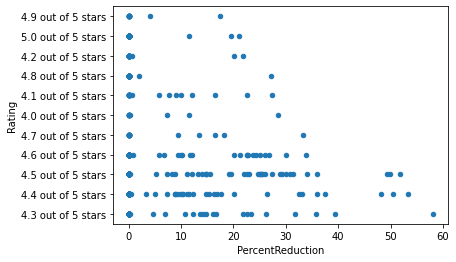

In [17]:
df.plot.scatter(y='Rating', x='PercentReduction');

In [17]:
df1.head(10)

,Title,ProdLink,TotalReviews,CouponPrice,PercentReduction
215,"HP Stream 11.6-inch HD Laptop, Intel Celeron N...",https://www.amazon.com/HP-11-6-inch-Celeron-Pe...,1163.0,99.25,58.120596
371,HP Chromebook 14-Inch Laptop with 180-Degree H...,https://www.amazon.com/HP-Chromebook-180-degre...,5001.0,121.89,53.370314
216,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",https://www.amazon.com/HP-Chromebook-14-Inch-C...,5816.0,119.99,51.811245
195,"Newest HP 14"" HD WLED Backlit High Performance...",https://www.amazon.com/HP-14-Performance-Wirel...,1193.0,139.00,50.533808
452,"HP 14 14"" HD SVA Anti-Glare Micro-Edge WLED-ba...",https://www.amazon.com/HP-Anti-Glare-Micro-Edg...,398.0,149.00,49.994966
267,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://www.amazon.com/HP-Storage-Touchscreen-...,545.0,121.49,49.377057
301,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://www.amazon.com/HP-Storage-14-inch-Micr...,504.0,119.00,48.258620
242,"HP 14 Laptop, AMD 3020e, 4 GB RAM, 64 GB eMMC ...",https://www.amazon.com/HP-Storage-14-inch-Micr...,227.0,139.00,39.459930
307,"2022 Newest HP Pavilion Laptop, 15.6"" Full HD ...",https://www.amazon.com/HP-Pavilion-Touchscreen...,10.0,719.00,37.423847
328,HP 14-fq0032ms Laptop for Business and Student...,https://www.amazon.com/HP-14-fq0032ms-Business...,398.0,249.00,35.981489


/var/folders/3c/hxpmknwd5cg9lwydrkf402qw0000gp/T/ipykernel_4795/3176312136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bins']=pd.cut(df1['PercentReduction'],bins=[0,30,45,65], labels=["0-30","30-45","45+"])


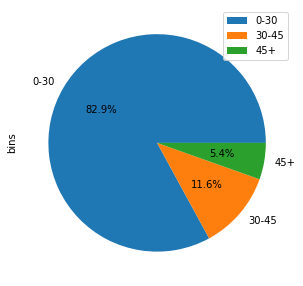

In [18]:
df2=df1
df2['bins']=pd.cut(df1['PercentReduction'],bins=[0,30,45,65], labels=["0-30","30-45","45+"])
df3=df2
df3=df3.groupby(['PercentReduction','bins']).size().unstack(fill_value=0)
df3
#df2
#df2.plot.pie(y='bins',subplots=True,figsize=(8,3))
bin_percent = pd.DataFrame(df2['bins'].value_counts(normalize=True)*100)
plot = bin_percent.plot.pie(y='bins',figsize=(5,5), autopct='%1.1f%%')
#df3.bins.value_counts().plot(kind='pie')

/var/folders/3c/hxpmknwd5cg9lwydrkf402qw0000gp/T/ipykernel_1998/2292958810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['bins']=pd.cut(df1['TotalReviews'],bins=[0,500,1000,100000], labels=["0-500","500-1000","1000+"])


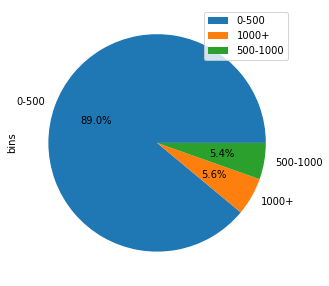

In [19]:
df5=df1
df5['bins']=pd.cut(df1['TotalReviews'],bins=[0,500,1000,100000], labels=["0-500","500-1000","1000+"])
df6=df5
df6=df6.groupby(['TotalReviews','bins']).size().unstack(fill_value=0)
df6
#df2
#df2.plot.pie(y='bins',subplots=True,figsize=(8,3))
bin_percent = pd.DataFrame(df5['bins'].value_counts(normalize=True)*100)
plot = bin_percent.plot.pie(y='bins',figsize=(5,5), autopct='%1.1f%%')
#df3.bins.value_counts().plot(kind='pie')